In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [312]:
BigMartData=pd.read_csv("/content/Train.csv")
BigMartData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [313]:
BigMartData.shape


(8523, 12)

In [314]:
BigMartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Categorical  Feature :** 
Item_Identifier

*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type 






In [315]:
#checking fro missing value
BigMartData.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# **Handling Missing Values**

> Mean--> Average values
> Mode--> Most Repeated Values.
Insert mean of colums in missing value is called imputation
Here Item_Weight  is numerical data we apply Mean and in Outlet_Size is it catogerical data so we are using Mode


In [316]:
# mean vlaue of Item_Weight
BigMartData["Item_Weight"].mean()


12.857645184136183

In [317]:
# filling missing value in  Item_Weight columns
BigMartData["Item_Weight"].fillna(BigMartData["Item_Weight"].mean(), inplace=True)


In [318]:
# creating pivot table  Accroding Outlet_type 
ModeOfOutlet_Size = BigMartData.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x: x.mode()[0]))
print(ModeOfOutlet_Size)
# Mode of Grosery store  is small and Supermartek type 1 is also small

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [319]:

MissingValues=BigMartData["Outlet_Size"].isnull()
MissingValues

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [320]:
BigMartData.loc[MissingValues,"Outlet_Size"]= BigMartData.loc[MissingValues,"Outlet_Type"].apply(lambda x:ModeOfOutlet_Size[x]) # this lambda function to replace values

In [321]:
#checking fro missing value
BigMartData.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Doing Data Anaylsis

In [322]:
# Satatical measure of data
BigMartData.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [323]:
# numerical Features
sns.set()

<Figure size 504x504 with 0 Axes>

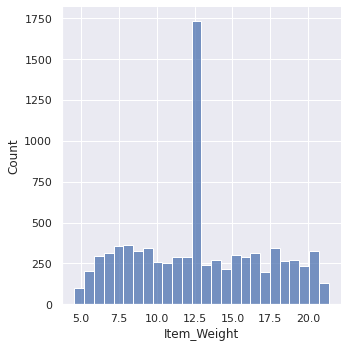

In [324]:
# item weight Figure
plt.figure(figsize=(7,7))
sns.displot(BigMartData["Item_Weight"])
plt.show()

<Figure size 504x504 with 0 Axes>

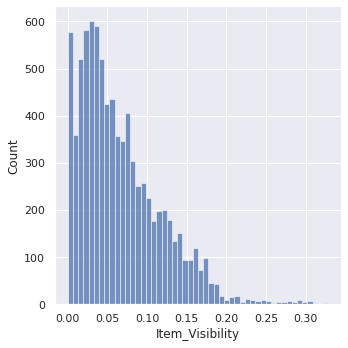

In [325]:
plt.figure(figsize=(7,7))
sns.displot(BigMartData["Item_Visibility"])
plt.show()

<Figure size 504x504 with 0 Axes>

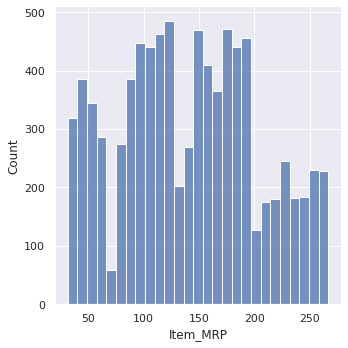

In [326]:
plt.figure(figsize=(7,7))
sns.displot(BigMartData["Item_MRP"])
plt.show()


<Figure size 504x504 with 0 Axes>

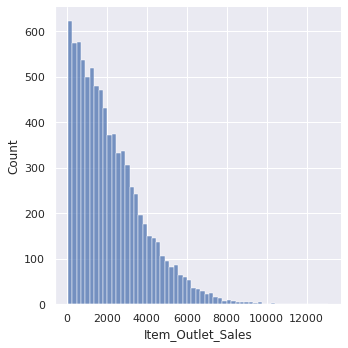

In [327]:
plt.figure(figsize=(7,7))
sns.displot(BigMartData["Item_Outlet_Sales"])
plt.show()

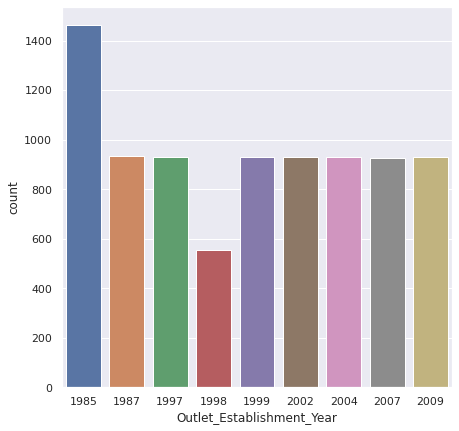

In [328]:
plt.figure(figsize=(7,7))
sns.countplot(x="Outlet_Establishment_Year",data=BigMartData)
plt.show()

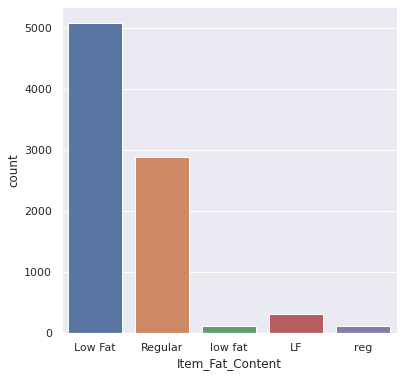

In [329]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=BigMartData)
plt.show()

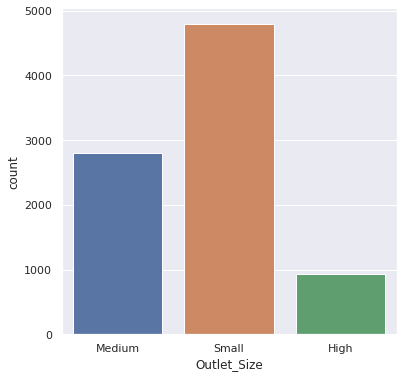

In [330]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=BigMartData)
plt.show()

# **Data preprocessing**

In [331]:
BigMartData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [332]:
# converting All Catogerical  Data into  numercal data and converting two regular fat in one in Item_Fat_Content column
BigMartData['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [333]:
BigMartData.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
BigMartData['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Label Encoding

In [334]:
encoder = LabelEncoder()

In [335]:
# converting All Catogerical  Data into  numercal data
BigMartData["Item_Identifier"] =encoder.fit_transform(BigMartData["Item_Identifier"])
BigMartData["Item_Fat_Content"]=encoder.fit_transform(BigMartData["Item_Fat_Content"])
BigMartData["Item_Type"]=encoder.fit_transform(BigMartData["Item_Type"])
BigMartData["Outlet_Identifier"]=encoder.fit_transform(BigMartData["Outlet_Identifier"])
BigMartData["Outlet_Size"]=encoder.fit_transform(BigMartData["Outlet_Size"])
BigMartData["Outlet_Location_Type"]= encoder.fit_transform(BigMartData["Outlet_Location_Type"])
BigMartData["Outlet_Type"]= encoder.fit_transform(BigMartData["Outlet_Type"])


In [336]:
BigMartData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [337]:
X=BigMartData.drop(columns="Item_Outlet_Sales",axis=1)
Y=BigMartData["Item_Outlet_Sales"]

In [338]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [339]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

**Splitting the data into Training data & Testing **

In [340]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [341]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [342]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

[15:23:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [343]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [344]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [345]:
print('R Squared value = ', r2_train)

R Squared value =  0.6364457030941357


In [346]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [347]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [348]:
print('R Squared value = ', r2_test)

R Squared value =  0.5867640914432671
